# Titanic Dataset (EDA) and Different Machine learning algorithm comparision
#### On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
#### While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
#### In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [53]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("Pandas version: {}".format(pd.__version__))
import numpy as np
print("Numpy version: {}".format(np.__version__))
import matplotlib 
print("Matplotlib version: {}".format(matplotlib.__version__))
import scipy as sp
print("Scipy version: {}".format(sp.__version__))
import sklearn
print("Sklear version: {}".format(sklearn.__version__))
import IPython
from IPython import display
print("IPython version: {}".format(sklearn.__version__))
import random
import time

import warnings
warnings.filterwarnings('ignore')
print('-'*25)

#from subprocess import check_output
#print(check_output(['ls','C:/Users/divya/DEEP LEARNING/titanic']).decode("utf8"))

Python version: 3.7.6 (tags/v3.7.6:43364a7ae0, Dec 19 2019, 00:42:30) [MSC v.1916 64 bit (AMD64)]
Pandas version: 1.0.3
Numpy version: 1.18.2
Matplotlib version: 3.2.1
Scipy version: 1.4.1
Sklear version: 0.22.2.post1
IPython version: 0.22.2.post1
-------------------------


In [54]:
from sklearn import svm,tree,linear_model,neighbors,naive_bayes,ensemble,discriminant_analysis,gaussian_process
#from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize']=12,8

In [55]:
mdata=pd.read_csv('train.csv')
tdata=pd.read_csv('test.csv')
data=mdata.copy(deep=True)
data_cleaner=[data,tdata]
print(mdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [56]:
mdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
mdata.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [58]:
print("Train Columns with null values:\n",data.isnull().sum())
print("-"*10)
print("Test Columns with null values:\n",tdata.isnull().sum())
print("-"*10)
mdata.describe(include="all")

Train Columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test Columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Alhomaki, Mr. Ilmari Rudolf",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [59]:
for sdata in data_cleaner:
    sdata['Age'].fillna(sdata['Age'].median(),inplace=True)
    sdata['Embarked'].fillna(sdata['Embarked'].mode()[0],inplace=True)
    sdata['Fare'].fillna(sdata['Fare'].median(),inplace=True)
drop_column=['PassengerId','Cabin','Ticket']
data.drop(drop_column,axis=1,inplace=True)

print(data.isnull().sum())
print("-"*10)
print(tdata.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [60]:
for sdata in data_cleaner:
    sdata['FamilySize']=sdata['SibSp']+sdata['Parch']+1 #total number of person assosiated with named person+him
    sdata['IsAlone']=1
    sdata['IsAlone'].loc[sdata['FamilySize']>1]=0 #Is he alone '1' or not '0' 
    sdata['Title']=sdata['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0] #To split Mr and  mrs title miss from the name
    sdata['FareBin']=pd.qcut(sdata['Fare'],4) #to change continous data into bins 
    sdata['AgeBin']=pd.cut(sdata['Age'].astype(int),5) #changing age into a range value

stat_min=10 #minimum reqiuerd value 
title_names=(data['Title'].value_counts()<stat_min) #to check different type of title rather than mr,mrs,miss,master
data['Title'] = data['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)#and changing them into common name 'Misc'
print(data['Title'].value_counts())
print('-'*10)



Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB


In [62]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  FamilySize   418 non-null    int64   
 12  IsAlone      418 non-null    int64   
 13  Title        418 non-null    object  
 14  FareBin      418 non-null    category
 15  AgeBin       418 non-null    category
dtypes: category(2), float64(2), int64(6), object(6)
memory usage: 47.1+ KB


In [63]:
data.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
794,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
48,0,3,"Samaan, Mr. Youssef",male,28.0,2,0,21.6792,C,3,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"
616,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,14.4000,S,3,0,Mr,"(7.91, 14.454]","(32.0, 48.0]"
174,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,30.6958,C,1,1,Mr,"(14.454, 31.0]","(48.0, 64.0]"
93,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,20.5750,S,4,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"
159,0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.5500,S,11,0,Master,"(31.0, 512.329]","(16.0, 32.0]"
552,0,3,"O'Brien, Mr. Timothy",male,28.0,0,0,7.8292,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
506,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26.0000,S,3,0,Mrs,"(14.454, 31.0]","(32.0, 48.0]"
240,0,3,"Zabour, Miss. Thamine",female,28.0,1,0,14.4542,C,2,0,Miss,"(7.91, 14.454]","(16.0, 32.0]"
659,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,113.2750,C,3,0,Mr,"(31.0, 512.329]","(48.0, 64.0]"


In [64]:
label=LabelEncoder()
for sdata in data_cleaner:
    sdata['Sex_Code']=label.fit_transform(sdata['Sex'])
    sdata['Embarked_Code']=label.fit_transform(sdata['Embarked'])
    sdata['Title_Code']=label.fit_transform(sdata['Title'])
    sdata['AgeBin_Code']=label.fit_transform(sdata['AgeBin'])
    sdata['FareBin_Code']=label.fit_transform(sdata['FareBin'])

Target=['Survived']

data_x=['Sex','Pclass','Embarked','Title','SibSp','Parch','Age','Fare','FamilySize','IsAlone']

data_x_calc=["Sex_Code",'Pclass','Embarked_Code','Title_Code','SibSp','Parch','Age','Fare']

data_xy=Target+data_x

print("ORIGINAL DATA:",data_xy,'\n')

data_x_bin=['Sex_Code','Pclass','Embarked_Code','Title_Code','FamilySize','AgeBin_Code','FareBin_Code']
data_xy_bin=Target+data_x_bin
print("BIN X Y:",data_xy_bin,'\n')

data_dummy=pd.get_dummies(data[data_x])
data_x_dummy=data_dummy.columns.tolist()
data_xy_dummy=Target+data_x_dummy
print('DUMMY X Y:',data_xy_dummy,'\n')

data_dummy.head()



ORIGINAL DATA: ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

BIN X Y: ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

DUMMY X Y: ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [65]:
print('Train Columns with null values: \n',data.isnull().sum())
print("-"*10)
print(data.info())
print("-"*10)
print("Test Columns with null values:\n",tdata.isnull().sum())
print("-"*10)
print(tdata.info())
print("-"*10)
mdata.describe(include='all')

Train Columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 no

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Alhomaki, Mr. Ilmari Rudolf",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [66]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(data[data_x_calc],data[Target],random_state=0)
X_bin_train,X_bin_test,Y_bin_train,Y_bin_test=model_selection.train_test_split(data[data_x_bin],data[Target],random_state=0)
X_dummy_train,X_dummy_test,Y_dummy_train,Y_dummy_test=model_selection.train_test_split(data_dummy[data_x_dummy],data[Target],random_state=0)

print('Data Shape:{}'.format(data.shape))
print('Train Shape:{}'.format(X_train.shape))
print('Test Shape:{}'.format(X_test.shape))
X_bin_train.head()

Data Shape:(891, 19)
Train Shape:(668, 8)
Test Shape:(223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


In [67]:
for x in data_x:
    if data[x].dtype != 'float64':
        print("Survival Correlation by:",x)
        print(data[[x,Target[0]]].groupby(x,as_index=False).mean())
        print('-'*10,'\n')
print(pd.crosstab(data['Title'],data[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

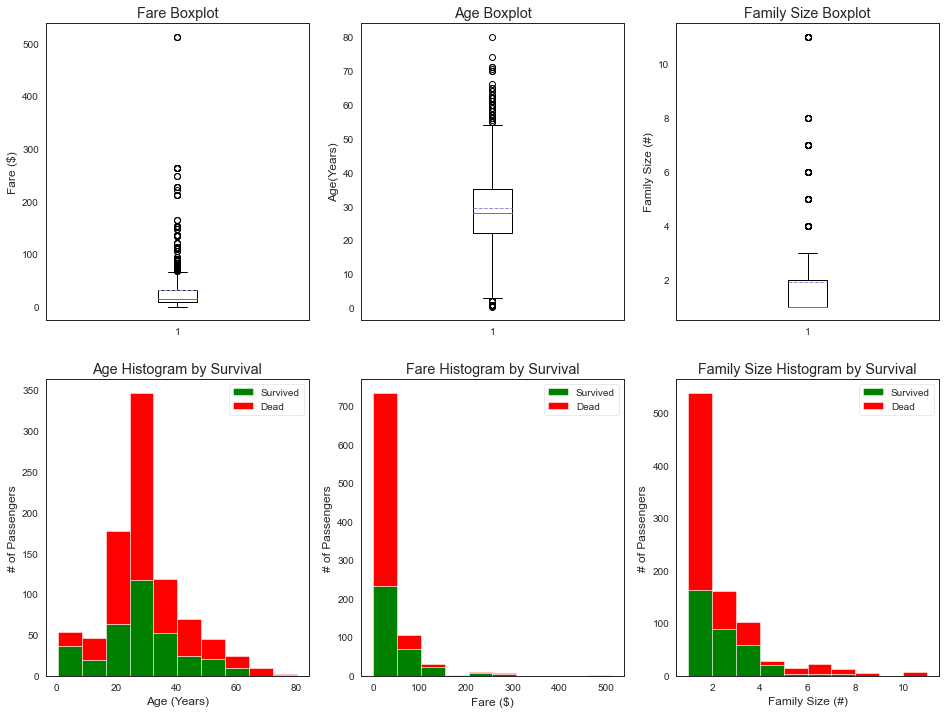

In [68]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data['Fare'],showmeans=True,meanline=True)
plt.title("Fare Boxplot")
plt.ylabel("Fare ($)")

plt.subplot(232)
plt.boxplot(x=data['Age'],showmeans=True,meanline=True)
plt.title("Age Boxplot")
plt.ylabel('Age(Years)')

plt.subplot(233)
plt.boxplot(x=data['FamilySize'],showmeans=True,meanline=True)
plt.title("Family Size Boxplot")
plt.ylabel("Family Size (#)")

plt.subplot(234)
plt.hist(x=[data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']],
        stacked=True,color=['g','r'],label=['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel("Age (Years)")
plt.ylabel("# of Passengers")
plt.legend()

plt.subplot(235)
plt.hist(x=[data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']],
        stacked=True,color=['g','r'],label=['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel("Fare ($)")
plt.ylabel("# of Passengers")
plt.legend()

plt.subplot(236)
plt.hist(x=[data[data['Survived']==1]['FamilySize'],data[data['Survived']==0]['FamilySize']],
        stacked=True,color=['g','r'],label=['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel("Family Size (#)")
plt.ylabel("# of Passengers")
plt.legend()

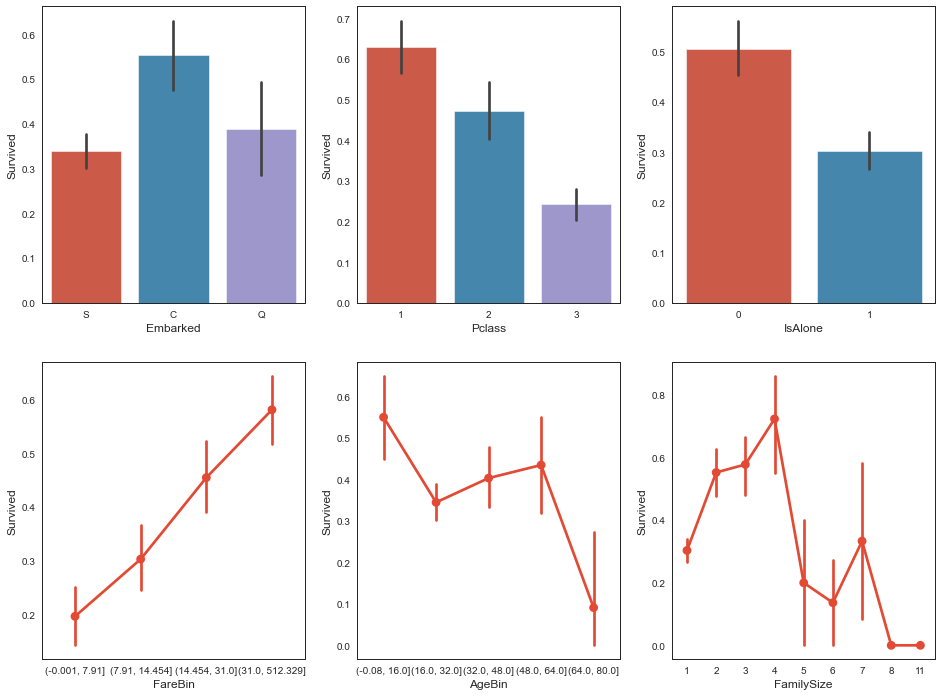

In [69]:
fig,saxis=plt.subplots(2,3,figsize=(16,12))
sns.barplot(x="Embarked",y='Survived',data=data,ax=saxis[0,0])
sns.barplot(x="Pclass",y='Survived',data=data,ax=saxis[0,1])
sns.barplot(x="IsAlone",y='Survived',data=data,ax=saxis[0,2])
sns.pointplot(x="FareBin",y='Survived',data=data,ax=saxis[1,0])
sns.pointplot(x="AgeBin",y='Survived',data=data,ax=saxis[1,1])
sns.pointplot(x="FamilySize",y='Survived',data=data,ax=saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparision')

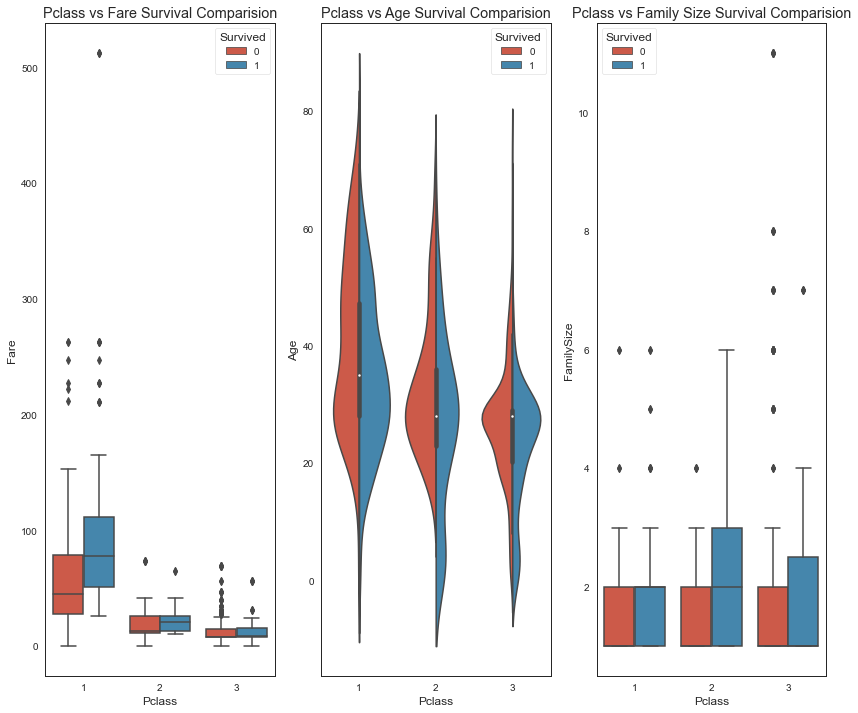

In [70]:
fig,(axis1,axis2,axis3)=plt.subplots(1,3,figsize=(14,12))
sns.boxplot(x='Pclass',y="Fare",hue="Survived",data=data,ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparision')
sns.violinplot(x='Pclass',y='Age',hue="Survived",data=data,split=True,ax=axis2)
axis2.set_title('Pclass vs Age Survival Comparision')
sns.boxplot(x='Pclass',y='FamilySize',hue="Survived",data=data,ax=axis3)
axis3.set_title('Pclass vs Family Size Survival Comparision')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

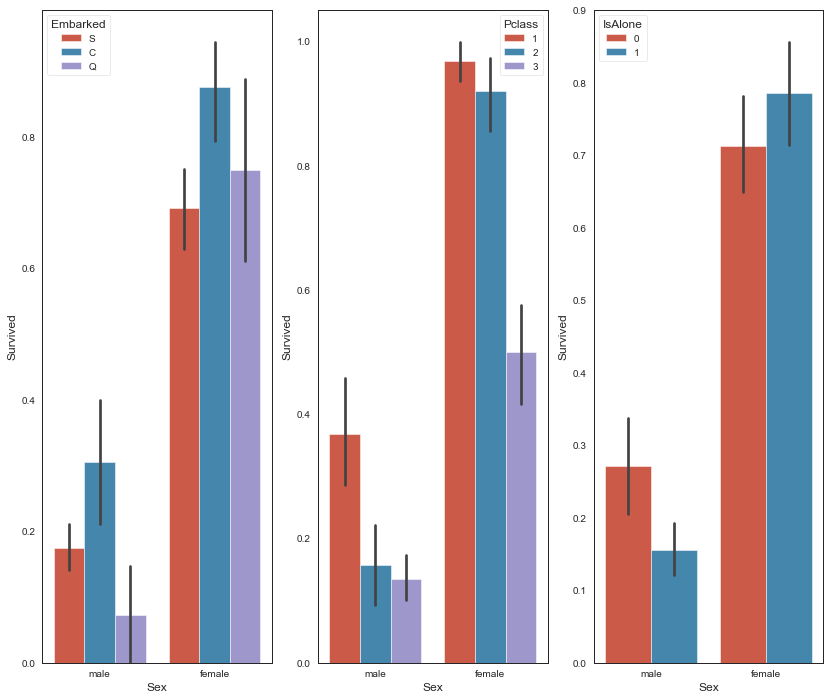

In [71]:
fig,qaxis=plt.subplots(1,3,figsize=(14,12))
sns.barplot(x='Sex',y='Survived',hue="Embarked",data=data,ax=qaxis[0])
axis1.set_title("Sex vs Embarked Survival Comparison")
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=data,ax=qaxis[1])
axis2.set_title("Sex vs Pclass Survival Comparison")
sns.barplot(x='Sex',y="Survived",hue='IsAlone',data=data,ax=qaxis[2])
axis3.set_title("Sex vs IsAlone Survival Comparison")

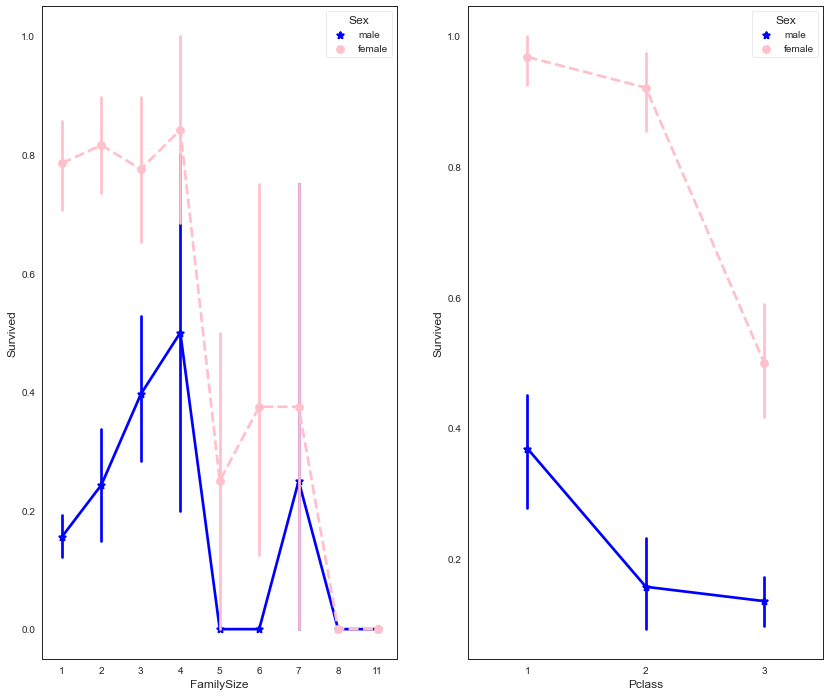

In [72]:
fig,(maxis1,maxis2)=plt.subplots(1,2,figsize=(14,12))
sns.pointplot(x="FamilySize",y='Survived',hue="Sex",data=data,
             palette={"male":"blue","female":"pink"},
             markers=["*",'o'],linestyles=['-','--'],ax=maxis1,
             )
sns.pointplot(x="Pclass",y='Survived',hue="Sex",data=data,
             palette={"male":"blue","female":"pink"},
             markers=["*",'o'],linestyles=['-','--'],ax=maxis2,
             )


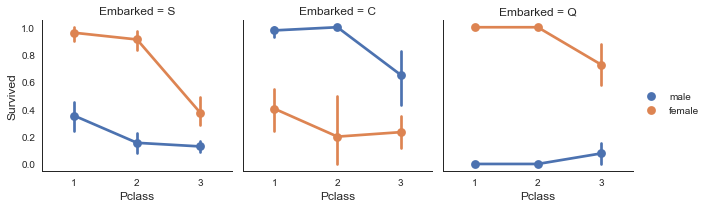

In [73]:
e=sns.FacetGrid(data,col='Embarked')
e.map(sns.pointplot,'Pclass','Survived','Sex',ci=95.0,palette='deep')
e.add_legend()

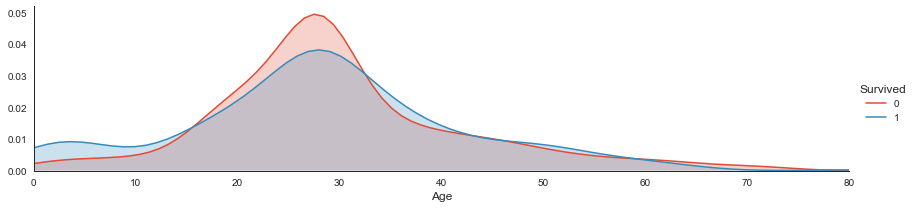

In [74]:
a=sns.FacetGrid(data,hue="Survived",aspect=4)
a.map(sns.kdeplot,'Age',shade=True)
a.set(xlim=(0,data['Age'].max()))
a.add_legend()

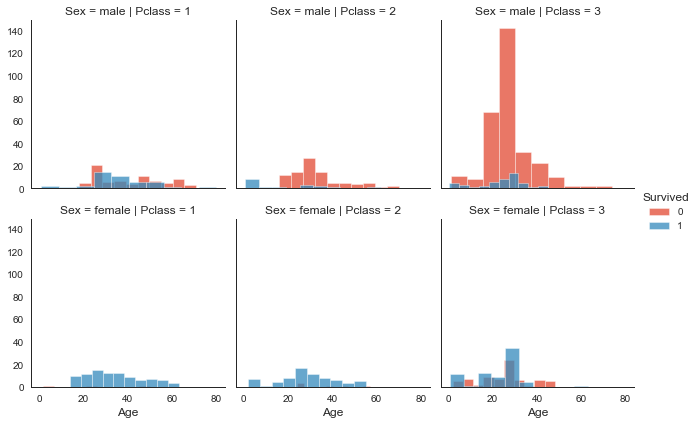

In [75]:
h=sns.FacetGrid(data,row='Sex',col='Pclass',hue='Survived')
h.map(plt.hist,'Age',alpha=0.75)
h.add_legend()

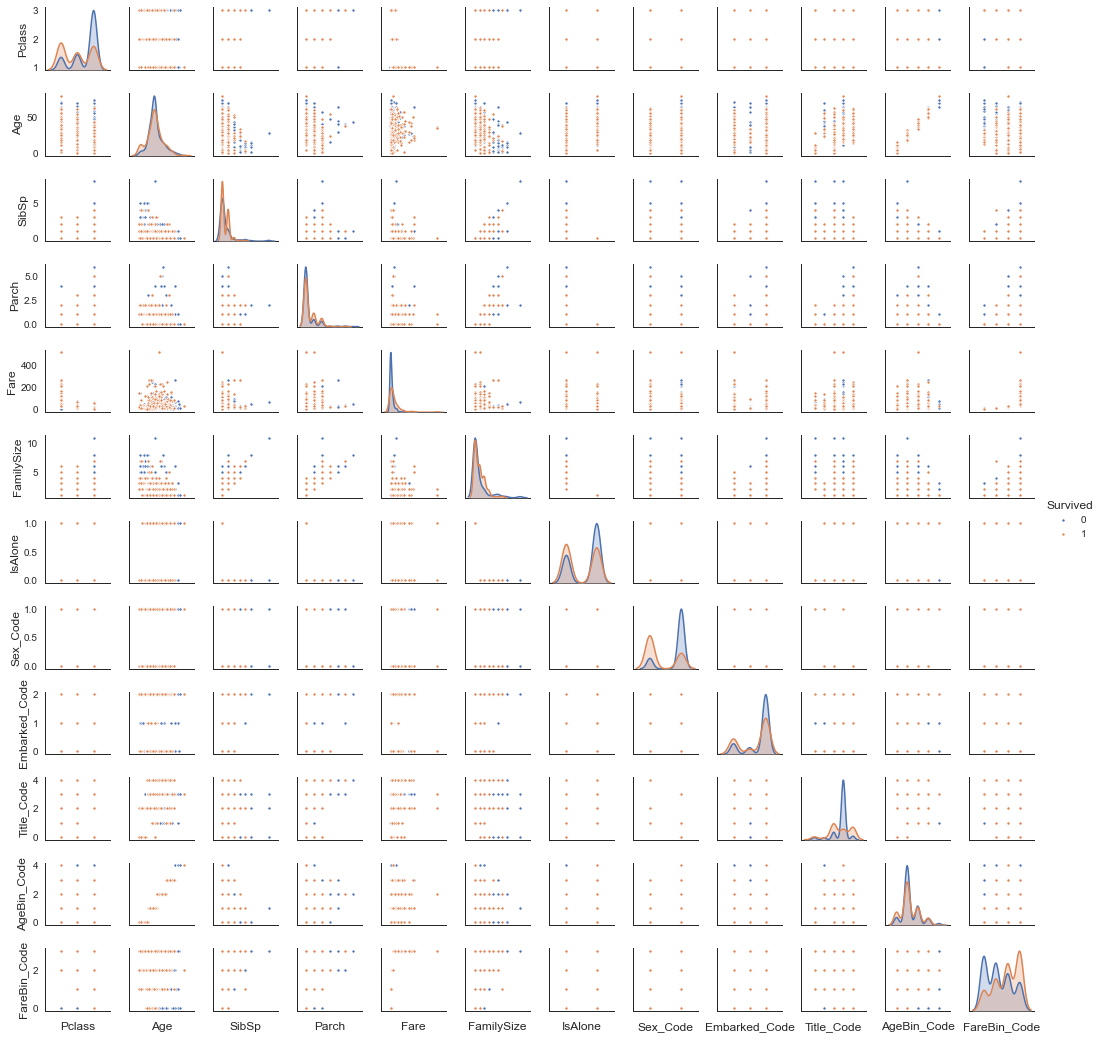

In [76]:
pp=sns.pairplot(data,hue='Survived',palette='deep',size=1.2,diag_kind='kde',
               diag_kws=dict(shade=True),plot_kws=dict(s=10))
pp.set(xticklabels=[])


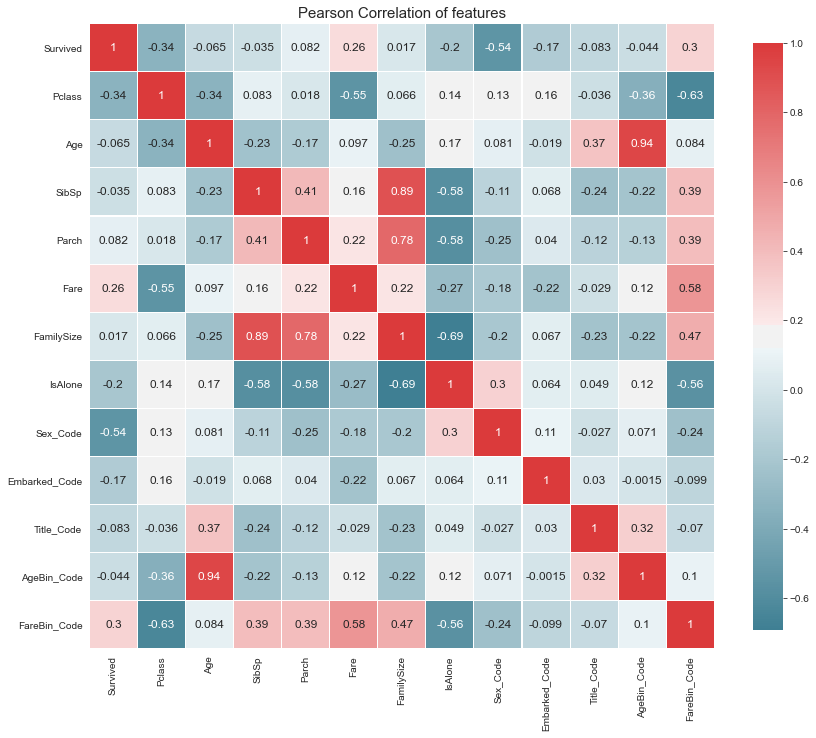

In [77]:
def corelation_heatmap(data):
    _,ax=plt.subplots(figsize=(14,12))
    colormap=sns.diverging_palette(220,12,as_cmap=True)
    _=sns.heatmap(data.corr(),cmap=colormap,square=True,cbar_kws={'shrink':.9},
                 ax=ax,annot=True,linewidths=0.1,vmax=1.0,linecolor='white',
                 annot_kws={'fontsize':12}
                 )
    plt.title("Pearson Correlation of features",y=1,size=15)
corelation_heatmap(data)

In [78]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
        
    ]




cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_predict = data[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data[data_x_bin], data[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    #MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data[data_x_bin], data[Target])
    MLA_predict[MLA_name] = alg.predict(data[data_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.829851,0.0715368,0.129717
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.827612,0.0409157,0.0276602
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.826119,0.0456629,0.0376783
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.825746,0.0581767,0.0987377
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.822015,0.0529916,0.0635552
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.821642,0.0568145,0.0157579
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.820522,0.0597493,0.00308416
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.813806,0.0690863,0.00360026
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.813433,0.0813399,0.00259888
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.81194,0.0498606,0.0594158


Text(0, 0.5, 'Algorithm')

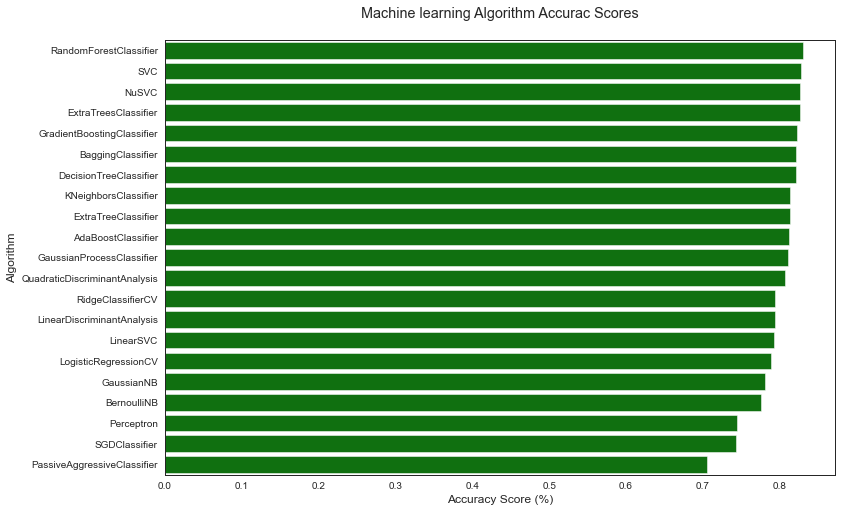

In [79]:
sns.barplot(x="MLA Test Accuracy Mean",y='MLA Name',data=MLA_compare,color='g')
plt.title("Machine learning Algorithm Accurac Scores\n")
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [80]:
classifier=svm.SVC() # using the best classifier accordinf to the graph
classifier.fit(data[data_x_bin],data[Target])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
predicted_values=classifier.predict(data[data_x_bin])

In [82]:
accuracy=metrics.accuracy_score(data[Target],predicted_values)

In [83]:
print(accuracy*100)

83.5016835016835


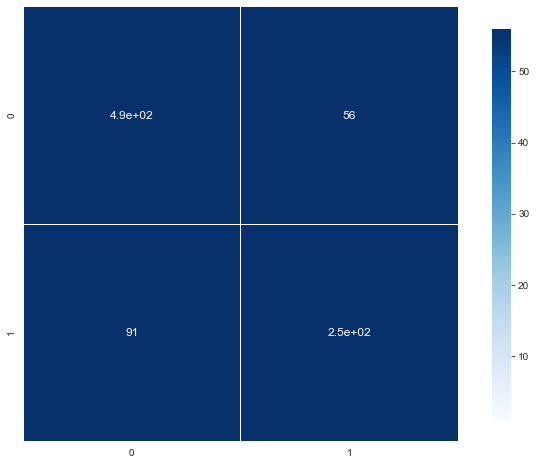

In [84]:
cm=metrics.confusion_matrix(data[Target],predicted_values)
sns.heatmap(cm,cmap='Blues',square=True,cbar_kws={'shrink':.9},
                 annot=True,linewidths=0.1,vmax=1.0,linecolor='white',
                 annot_kws={'fontsize':12})

In [85]:
test_data=tdata[data_x_bin]

In [86]:
predicted_values_test=classifier.predict(test_data)

In [87]:
predicted_values_test # predicted values for test dataset

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [88]:
result_data=pd.DataFrame(columns=['PassengerId','Survived'])

In [89]:
result_data['PassengerId']=tdata['PassengerId']

In [90]:
result_data['Survived']=predicted_values_test

In [91]:
result_data.to_csv("result_final.csv",index=False) #saving the final result in the form of .csv file